# Example: Counting Rainy Days

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

df = pd.read_csv('Seattle2014.csv')
df.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [10]:
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0
inches.shape

(365,)

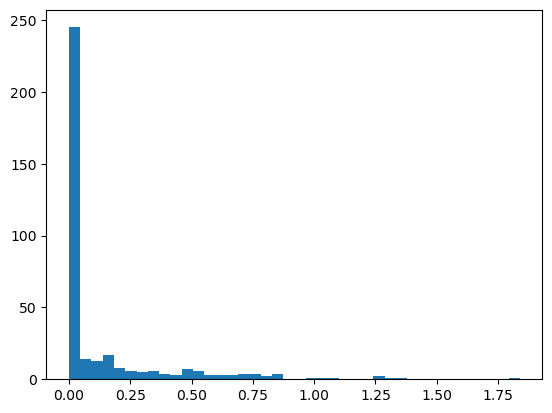

In [11]:
plt.hist(inches, 40);

# 비교 연산자 as ufuncs

In [4]:
x = np.array([1, 2, 3, 4, 5])

In [6]:
print(f"Less than                : {x < 3}")
print(f"Greater than             : {x > 3}")
print(f"Less than or equal to    : {x <= 3}")
print(f"Greater than or equal to : {x >= 3}")
print(f"Equal to                 : {x == 3}")
print(f"Not equal to             : {x != 3}")

Less than                : [ True  True False False False]
Greater than             : [False False False  True  True]
Less than or equal to    : [ True  True  True False False]
Greater than or equal to : [False False  True  True  True]
Equal to                 : [False False  True False False]
Not equal to             : [ True  True False  True  True]


In [11]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

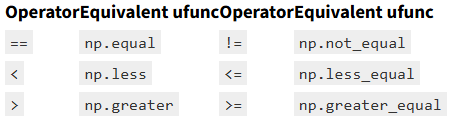

### 엔트리 개수 세기

In [20]:
rng = np.random.RandomState(0)
x = rng.randint(10, size = (3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [22]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [ ]:
# 6보다 작으면서 0이 아닌 것
np.count_nonzero(x < 6)

8

In [ ]:
# 6보다 작은 것 개수 (True는 1로 계산되어 sum = 개수가 됨)
np.sum(x < 6)

8

### .any .all

In [ ]:
# 하나라도 True인 경우
np.any(x > 8)

True

In [ ]:
# 모두 True인 경우
np.all(x > 8)

False

## Boolean 연산자

In [12]:
np.sum((inches > 0.5) & (inches < 1))

29

In [14]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


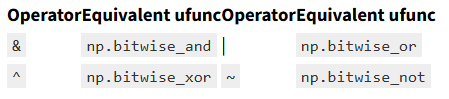

# Boolean Array as Mask

In [37]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [39]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [ ]:
# 조건문을 이용하여 인덱싱 : Masking
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [46]:
rainy = (inches > 0)

days = np.arange(365)
summer = (days > 172) & (days < 262)

print(f"Median precip on rainy days in 2014 (inches) : {np.median(inches[rainy])}")
print(f"Median precip on summer days in 2014 (inches) : {np.median(inches[summer])}")
print(f"Maximum precip on summer days in 2014 (inches) : {np.max(inches[summer])}")
print(f"Median precip on non-summer days in 2014 (inches) : {np.median(inches[rainy & ~summer])}")

Median precip on rainy days in 2014 (inches) : 0.19488188976377951
Median precip on summer days in 2014 (inches) : 0.0
Maximum precip on summer days in 2014 (inches) : 0.8503937007874016
Median precip on non-summer days in 2014 (inches) : 0.20078740157480315


# and/or 와 &/|의 차이점

In [48]:
bool(42), bool(0)

(True, False)

In [49]:
bool(42 and 0)

False

In [50]:
bool(42 & 0)

False

In [15]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [16]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()